# Exercise 1

In this exercise, we will perform classification on a simple dataset.

We can generate the dataset with:

In [12]:
from sklearn.datasets import make_blobs

(X, y) = make_blobs(n_samples=5000, n_features=2, centers=2,
cluster_std=3.5, random_state=1)

X and y are the features and the label, respectively. We can look at the format of the data:

In [15]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(5000, 2)
(5000,)
float64
int32


As you can see, X and y are numpy arrays. There are a total of 5000 samples in the dataset. X has 2 features per sample, and y are the corresponding classes.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

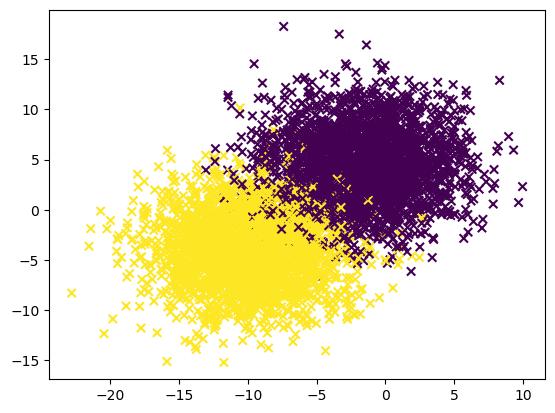

In [22]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker="x", c=y)
plt.show()

We can see that the two clusters are not linearily separable, but a linear classification would still yield good results. Your tasks in this notebook are now:

- Add and adapt your regression code (using numpy, not sklearn) from the previous exercise, so that is can predict the class label for each sample. This means, we treat the class of a point (0 or 1) as the target value of the regression. The linear regression will then yield us a formula that can give each (x, y) location a score, which class it might belong to. It's not a probability because it does not need to be between 0 and 1, but we can interpret a value being nearer to 0 as a higher probability for the class 0, and a value being nearer to 1 as a higher probability for class 1.
- Perform a classification of the dataset using the regression formula. That means, assign the class 0 to data points that have a regression 'score' that is nearer to 0 than to 1, and assign the class 1 to the other points. Visualize the learned classification with matplotlib by coloring each (x, y) pair in the dataset with a color that depends on your classification (e.g. yellow for class 0, blue for class 1).
- Calculate the classification accurracy $\left( \frac{n_{\text{correctly-classified}}}{(n_{\text{correctly-classified}} + n_{\text{incorrectly-classified}})} \right) $
- Additional Task: If everything works, you will see that your classification splits the dataset at a specific line between the two clusters. Calculate the formula for this line and plot it as a line using matplotlib.
- After you have done the iris classification exercise, print out the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) using sklearn for this binary classification task. Then, plot the precision-recall curve using [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve) and matplotlib
- Additional Task: After you have done all the above, write your own code to calculate the metrics shown in classification_report and use that code to generate the precision-recall curve manually.

## Solution

In [27]:
import numpy as np

ones = np.ones(X.shape[0])
X_ = np.c_[X, ones]
weights = (np.linalg.pinv(X_.T @ X_) @ X_.T) @ y

X_mat = np.matrix(X_)
y_mat = np.matrix(y).reshape(-1,1)

weights = ((X_mat.T @ X_mat).I @ X_mat.T) @ y_mat
predictions = X_mat @ weights


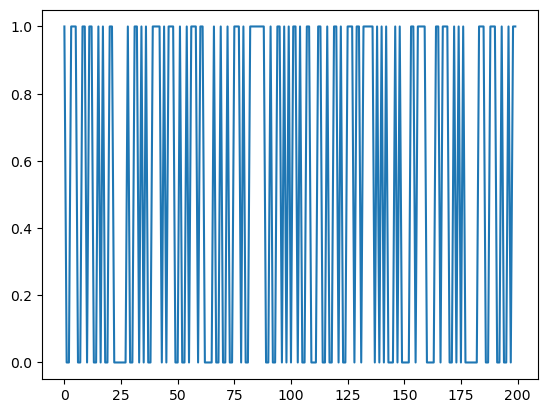

In [38]:
plt.plot(predictions[0:200])
# a random plot first 200 values are taken to
# get an idea about prediction. The values are classified to 0 or 1
# predictions can be made by classifying as lessthan 
# or greater than 0.5

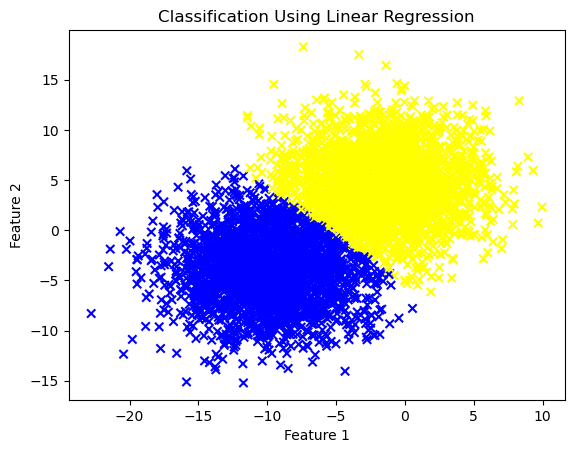

In [40]:
import matplotlib.colors as mcolors
predictions = np.where(predictions < 0.5,0,1).astype(int)
cmap = mcolors.ListedColormap(['yellow', 'blue'])
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=predictions,cmap = cmap, marker='x')
plt.title("Classification Using Linear Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Accuracy

In [43]:
correctly_class = np.sum(predictions == y_mat)
incorrectly_class = np.sum(predictions != y_mat)
print(correctly_class, incorrectly_class)
accuracy = correctly_class / len(y_mat)
print(accuracy)

4793 207
0.9586


(200,)
[[ 23.7492768   23.57776668  23.40625657  23.23474645  23.06323633
   22.89172621  22.72021609  22.54870597  22.37719585  22.20568574
   22.03417562  21.8626655   21.69115538  21.51964526  21.34813514
   21.17662502  21.0051149   20.83360479  20.66209467  20.49058455
   20.31907443  20.14756431  19.97605419  19.80454407  19.63303396
   19.46152384  19.29001372  19.1185036   18.94699348  18.77548336
   18.60397324  18.43246313  18.26095301  18.08944289  17.91793277
   17.74642265  17.57491253  17.40340241  17.2318923   17.06038218
   16.88887206  16.71736194  16.54585182  16.3743417   16.20283158
   16.03132147  15.85981135  15.68830123  15.51679111  15.34528099
   15.17377087  15.00226075  14.83075064  14.65924052  14.4877304
   14.31622028  14.14471016  13.97320004  13.80168992  13.6301798
   13.45866969  13.28715957  13.11564945  12.94413933  12.77262921
   12.60111909  12.42960897  12.25809886  12.08658874  11.91507862
   11.7435685   11.57205838  11.40054826  11.22903814  11

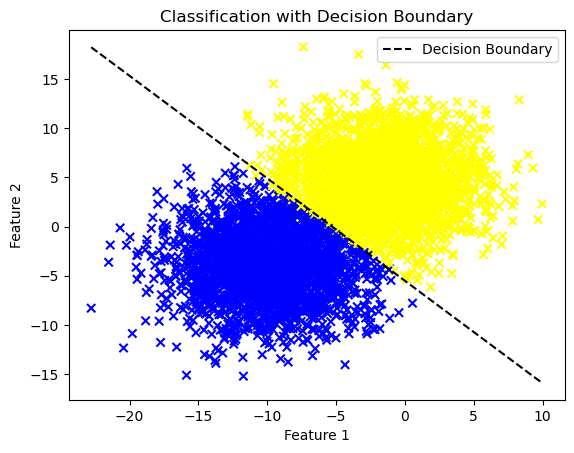

In [45]:
intercept = -(weights[2] -0.5) / weights[0]
slope = -weights[1] / weights[0]

x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)

print(x_values.shape)
y_values = slope * x_values + intercept
print(slope * x_values)

y_values = y_values.T

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap=cmap, marker='x')
plt.plot(x_values, y_values, 'k--', label='Decision Boundary')
plt.title("Classification with Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



In [47]:
from sklearn.metrics import classification_report
y_array = np.asarray(y_mat).ravel()  # Convert to array and flatten to 1D
predictions_array = np.asarray(predictions).ravel() # discrete value
classification_report_ans =  classification_report(y_array, predictions_array, digits =4, target_names=['class 0', 'class 1'], zero_division='warn')
print(classification_report_ans)

              precision    recall  f1-score   support

     class 0     0.9584    0.9588    0.9586      2500
     class 1     0.9588    0.9584    0.9586      2500

    accuracy                         0.9586      5000
   macro avg     0.9586    0.9586    0.9586      5000
weighted avg     0.9586    0.9586    0.9586      5000



In [49]:
# print(predictions.shape)

In [51]:
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)
predictions_scores = model.predict(X) #continuous values
precision, recall, thresholds = precision_recall_curve(y_array, predictions_scores, drop_intermediate=False)
print(precision,recall)

[0.5        0.50010002 0.50020008 ... 1.         1.         1.        ] [1.e+00 1.e+00 1.e+00 ... 8.e-04 4.e-04 0.e+00]


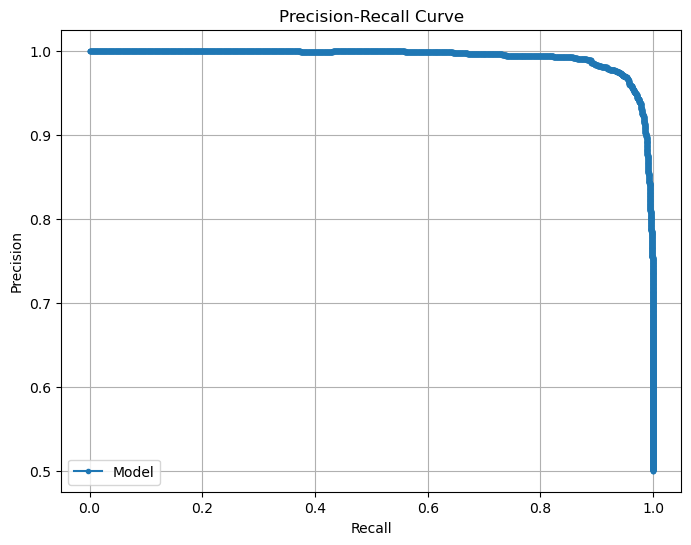

In [53]:
from sklearn.metrics import precision_recall_curve
# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [56]:
import numpy as np


def calculate_metrics(y_array, predictions_array):
    classes = np.unique(y_array) # THis function selects only unique values, here 0 and 1
    metrics = {}
    for values in classes:
        # True Positives, False Positives, False Negatives, True Negatives
        tp = np.sum((y_array == values) & (predictions_array == values))
        fp = np.sum((y_array != values) & (predictions_array == values))
        fn = np.sum((y_array == values) & (predictions_array != values))
        tn = np.sum((y_array != values) & (predictions_array != values))
    
        # Precision, Recall, F1-score using ternary operator
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
        # Support values
        support_positive = np.sum(y_array == values)
        support_negative = np.sum(y_array != values)
    
        metrics[values] = {
            'precision': precision,
            'recall': recall,
            'f1_score': f1_score,
            'support_positive': support_positive,
            'support_negative': support_negative
        }
        
    return metrics

metrics = calculate_metrics(y_array, predictions_array)
print(metrics[0])
print("\n")
print(metrics[1])



{'precision': 0.9584166333466614, 'recall': 0.9588, 'f1_score': 0.9586082783443312, 'support_positive': 2500, 'support_negative': 2500}


{'precision': 0.9587835134053622, 'recall': 0.9584, 'f1_score': 0.9585917183436687, 'support_positive': 2500, 'support_negative': 2500}


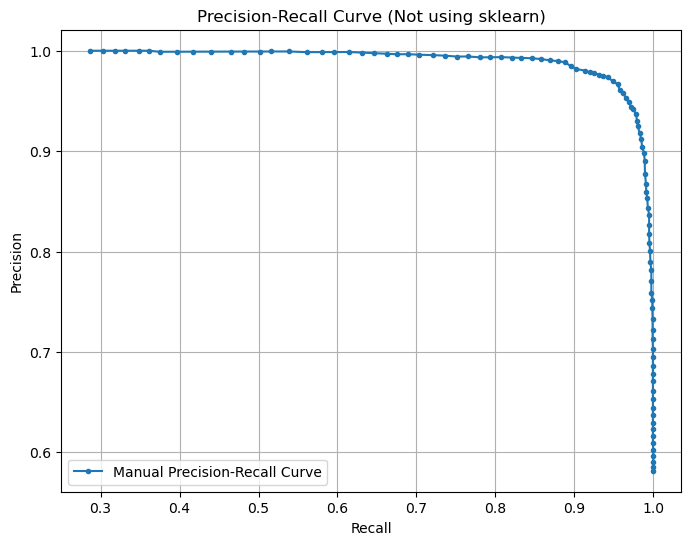

In [60]:
def precision_recall_curve_manual(y, scores):
    precision_values = []
    recall_values = []
    thresholds = np.linspace(0, 1, 100)  # Use 100 thresholds between 0 and 1

    for threshold in thresholds:
        predictions_array = (scores >= threshold).astype(int)
        
        metrics = calculate_metrics(y, predictions_array)
        precision_values.append(metrics[1]['precision']) #for class 1
        recall_values.append(metrics[1]['recall'])
    
    return precision_values, recall_values, thresholds

precision_values, recall_values, thresholds = precision_recall_curve_manual(y_array, predictions_scores)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_values, precision_values, marker='.', label='Manual Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Not using sklearn)')
plt.legend()
plt.grid(True)
plt.show()
